### Name: SHARDUL GORE
### Roll: R016

## Q3

In [ ]:
# importing libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
# loading dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape, X_test.shape # checking shape of dataset

((60000, 28, 28), (10000, 28, 28))

In [24]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

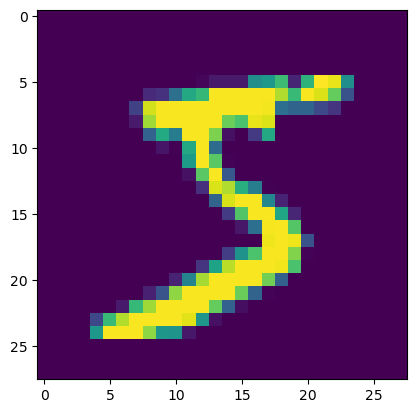

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0]) # plotting image

In [ ]:
max_value_train = X_train.max()
max_value_test = X_test.max()

print(max_value_train, max_value_test) # printing max value of dataset

255 255


In [ ]:
# normalizing datset
X_train = X_train/max_value_train 
X_test = X_test/max_value_test

In [ ]:
# creating model
model = Sequential() # creating sequential model

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # adding convolutional layer
model.add(MaxPooling2D((2, 2))) # adding maxpooling layer
model.add(Conv2D(64, (3, 3), activation='relu')) # adding convolutional layer
model.add(Flatten()) # flattening layer
model.add(Dense(128, activation='relu')) # adding dense layer
model.add(Dense(10, activation='softmax')) # adding dense layer

In [ ]:
model.summary() # checking model summary

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       991,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,466 (3.86 MB)

 Trainable params: 1,011,466 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # compiling model

In [ ]:
%%time
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2) # fitting model

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9152 - loss: 0.2793 - val_accuracy: 0.9837 - val_loss: 0.0597
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9827 - loss: 0.0600 - val_accuracy: 0.9833 - val_loss: 0.0635
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9846 - loss: 0.0623 - val_accuracy: 0.9847 - val_loss: 0.0936
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9849 - loss: 0.0957 - val_accuracy: 0.9806 - val_loss: 0.2915
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9866 - loss: 0.1618 - val_accuracy: 0.9815 - val_loss: 0.5714
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9866 - loss: 0.3077 - val_accuracy: 0.9785 - val_loss: 0.8052
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9854 - loss: 0.5845 - val_accuracy: 0.9772 - val_loss: 1.8577
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9853 -

In [ ]:
y_prob = model.predict(X_test) # predicting model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# predicted values
y_pred = y_prob.argmax(axis=-1) 
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) # checking accuracy

0.981

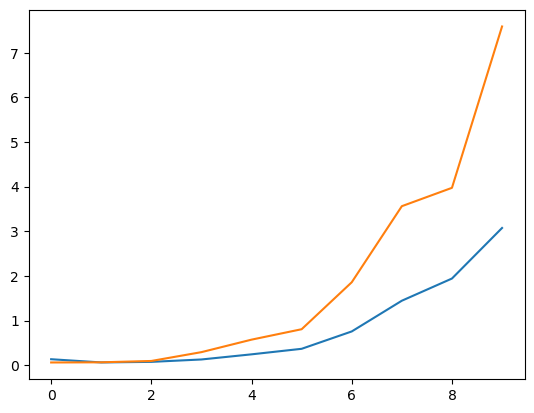

In [ ]:
# plotting accuracys
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Q1) b)

### Ans: We use Max-pooling because of the following reasons:

#### 1. max pooling layer is used to reduce the spatial dimensions of the output volume
#### 2. it is used to reduce the number of parameters and computation in the network
#### 3. it is used to control overfitting
#### 4. it is used to make the detection of features invariant to scale and orientation changes
#### 5. it is used to make the detection of features more robust
#### 6. it is used to make the detection of features more computationally efficient
#### 7. it is used to make the detection of features more translation invariant